In [19]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import sys
sys.path.append(os.path.abspath("../../../../"))
import Constants as c
import Utilities as utils
print(os.getcwd())

/Users/housemex408/Documents/Git-Projects/PRAXIS/iROIEstimator/scripts/notebook/results/FINAL/H2


In [20]:

# file_line = "h2_model_performance_05_27_2020.csv"
file_line = "h2_metrics_h1_DT_05_28_2020.csv"

df = pd.read_csv(file_line)

print(len(df))
# df.dropna(subset=[c.PRED_25], inplace=True)
# df.dropna(subset=[c.PRED_50], inplace=True)

# df.where(df[c.T_RECORDS] > 2, inplace = True)
# df.where(df[c.P_NA] <= .75, inplace = True)
# df.dropna()

print(len(df))

3564
3564


In [21]:
def hypothesisTest_Effort(model_records, model1, model2, task, pred, sample_size):
    print("H2 test for {0}, {1}, and task = '{1}'".format(model1, model2, task))

    filter = True

    if task != "ALL":
        filter = model_records[c.TASK] == task
    
    s1_filter = (model_records[c.MODEL] == model1) & filter
    s2_filter = (model_records[c.MODEL] == model2) & filter
    s1 = model_records[s1_filter].sample(n=sample_size, random_state=0)
    s2 = model_records[s2_filter].sample(n=sample_size, random_state=0)

    num_records = len(s1)
    s1_median = round(s1[pred].median(),2)
    s2_median = round(s2[pred].median(),2)
    s1_std = round(s1[pred].std(),2)
    s2_std = round(s2[pred].std(),2)

    print("Number of records: {0}".format(num_records))
    print("{0} sample median: ".format(model1), s1_median)
    print("{0} sample median: ".format(model2), s2_median)
    print("{0} sample std: ".format(model1), s1_std)
    print("{0} sample std: ".format(model2), s2_std)
    
    alpha = 0.05

    is_gaussian = utils.gaussian_test(model_records[pred], alpha)

    utils.two_sample_rank_test(s1[pred], s2[pred], model1, model2, alpha)

    fig = plt.figure(figsize=(8,3))
    plt.tight_layout()
    
    sb.set(style="dark", palette="pastel")
    sb.distplot(s1[pred], kde=False, hist_kws={"histtype": "stepfilled", "alpha": 0.7, "linewidth": 3, "label":model1}, label=model1)
    sb.distplot(s2[pred], kde=False, hist_kws={"histtype": "stepfilled", "alpha": 0.7, "linewidth": 3, "label":model2}, label=model2)
    plt.title('PRED25 Distributions for Core & External Contributors (task = {0})'.format(task))
    plt.ylabel("Count")
    fig.legend(loc='lower right')
    plt.show()

In [22]:
task = "BUG"
sample_size = 40

H2 test for Module_CC, Module_EC, and task = 'Module_EC'
Number of records: 40
Module_CC sample median:  0.76
Module_EC sample median:  0.91
Module_CC sample std:  0.16
Module_EC sample std:  0.12
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
Two Sample Rank Test p-value:  0.00023862051753000506
Two Sample Rank Test: Module_CC median is not likely to be the same as Module_EC (reject H0)


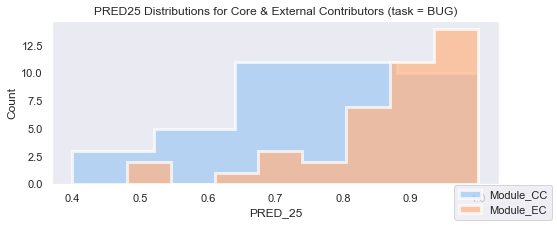

In [23]:
hypothesisTest_Effort(df.copy(), c.MODULE_CC, c.MODULE_EC, task, c.PRED_25, sample_size)

H2 test for Line_CC, Line_EC, and task = 'Line_EC'
Number of records: 40
Line_CC sample median:  0.68
Line_EC sample median:  0.88
Line_CC sample std:  0.18
Line_EC sample std:  0.15
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
Two Sample Rank Test p-value:  0.00023962982080783367
Two Sample Rank Test: Line_CC median is not likely to be the same as Line_EC (reject H0)


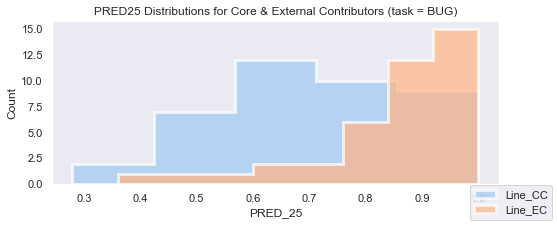

In [24]:
hypothesisTest_Effort(df.copy(), c.LINE_CC, c.LINE_EC, task, c.PRED_25, sample_size)